In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


pct_is_new                   0.176661
n_biggest_anc                0.027682
pct_of_secbiggest_anc_new    0.000213
pct_top_5_anc                0.036736
wrcr                         0.065790
rcr_mid                      0.128799
rcr_hi                       0.063565
human                        0.100670
animal                       0.070585
molecular_cellular           0.032694
is_clinical                  0.194120
is_research_article          0.241399
cited_by_clin                0.075421
nih                          0.124244
rage                         0.034586
dtype: float64


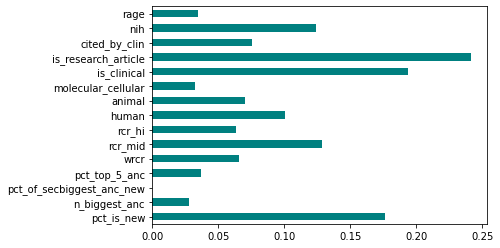

[0.0870819] [[ 12.36955932  11.01678983  -1.58727728   1.02272586 -10.29001489
    3.19716609  -0.42804958   6.49862279   5.24352184   5.23507984
    5.86588958  -9.31290813   0.23895725  -2.46194217  -0.36684234]] 0.8264462809917356
cross validated f1 score  0.8106726606726606


In [2]:
#best f1 score
x_train = pd.read_csv("data_84.csv")
y_train = x_train['class']
'''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)'''

x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
x_train = x_train.drop(['n_secbiggest_anc','n_clusts_90_anc','cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    

importance = mutual_info_classif(x_train,y_train)
feat_imp = pd.Series(importance,x_train.columns[0:len(x_train.columns)])
print(feat_imp)
feat_imp.plot(kind = 'barh',color = 'teal')
plt.show()

#x_train =  StandardScaler().fit_transform(x_train) 

'''x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''

y_train = np.array(y_train)
model = LogisticRegression(random_state=0, C = 100).fit(x_train,y_train) ##logistioc
    
print(model.intercept_, model.coef_, model.score(x_train, y_train))
scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
print("cross validated f1 score ",scores.mean())

actual len  4939
len of xtest  443
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1978
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(443,)
no of positive  175
len of predy  175


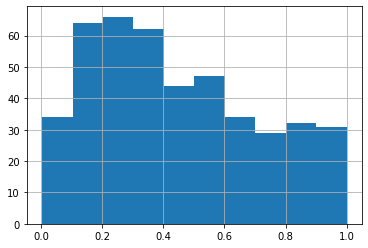

$$$  443   175
total positive  175
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5213
len of xtest  468
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1979
[1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7769264069264069
(468,)
no of positive  217
len of pr

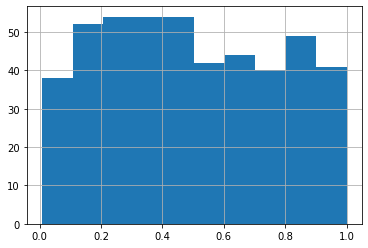

$$$  468   217
total positive  217
tp tn fp fn 1   0   1   0
year  1979 positive  1
actual len  5453
len of xtest  505
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1980
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(505,)
no of positive  180
len 

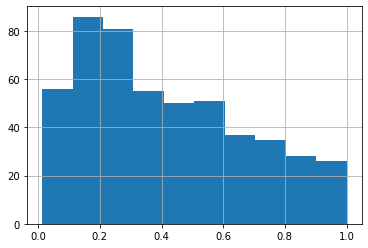

$$$  505   180
total positive  180
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  5700
len of xtest  560
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1981
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(560,)
no of positive  201
len 

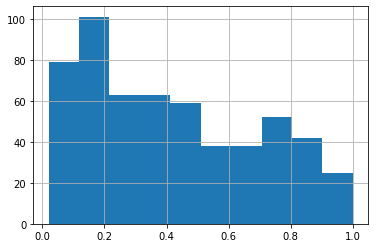

$$$  560   201
total positive  201
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  5958
len of xtest  589
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1982
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(589,)
no of positive  210
len 

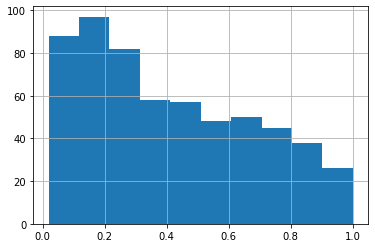

$$$  589   210
total positive  210
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6242
len of xtest  636
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1983
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(636,)
no of positive  214
len 

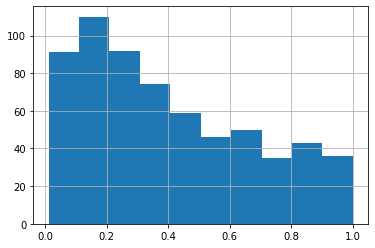

$$$  636   214
total positive  214
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  6521
len of xtest  674
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1984
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(674,)
no of positive  215
len 

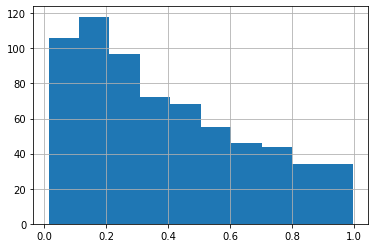

$$$  674   215
total positive  215
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  6825
len of xtest  708
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1985
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(708,)
no of positive  215
len 

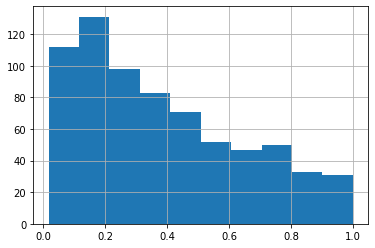

$$$  708   215
total positive  215
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7188
len of xtest  771
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1986
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(771,)
no of positive  218
len 

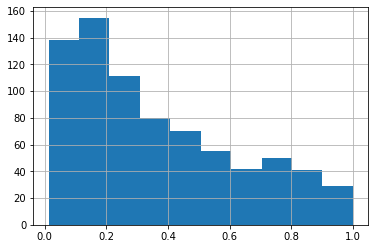

$$$  771   218
total positive  218
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  7569
len of xtest  812
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1987
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(812,)
no of positive  227
len 

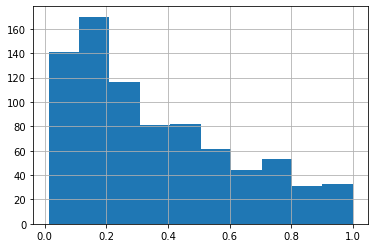

$$$  812   227
total positive  227
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  7973
len of xtest  852
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1988
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(852,)
no of positive  245
len 

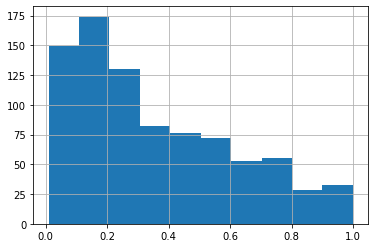

$$$  852   245
total positive  245
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  8315
len of xtest  910
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1989
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(910,)
no of positive  260
len 

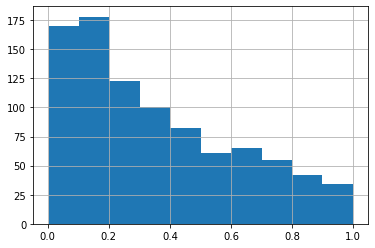

$$$  910   260
total positive  260
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  8642
len of xtest  966
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1990
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(966,)
no of positive  272
len 

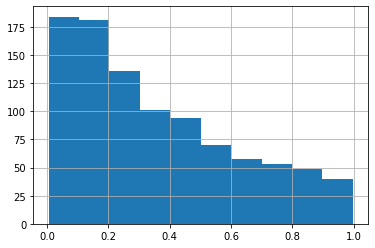

$$$  966   272
total positive  272
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  9018
len of xtest  1030
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1991
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(1030,)
no of positive  282
le

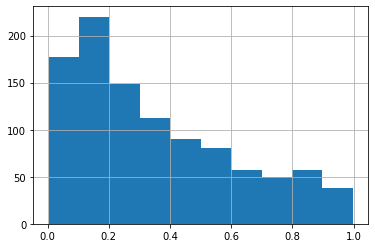

$$$  1030   282
total positive  282
tp tn fp fn 0   0   0   0
year  1991 positive  0
actual len  9369
len of xtest  1090
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1992
[1979 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7941878954378955
(1090,)
no of positive  308
len of

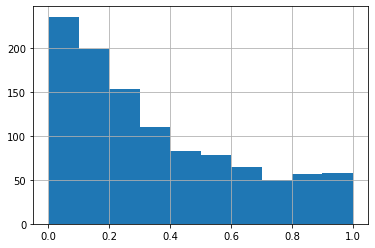

$$$  1090   308
total positive  308
tp tn fp fn 0   0   0   0
year  1992 positive  0
actual len  9723
len of xtest  1151
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1993
[1979 1992 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7921936396936398
(1151,)
no of positive  302
len of

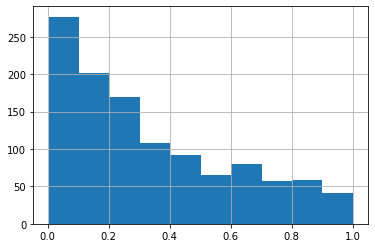

$$$  1151   302
total positive  302
tp tn fp fn 0   0   0   0
year  1993 positive  0
actual len  10084
len of xtest  1298
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  235
year   1994
[1979 1992 1993 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.776521223874165
(1298,)
no of positive  349
len of

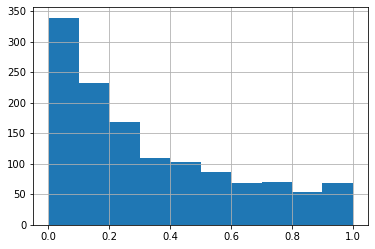

$$$  1298   349
total positive  349
tp tn fp fn 1   1   0   0
year  1994 positive  1
actual len  10442
len of xtest  1367
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1995
[1979 1992 1993 1994 1997 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.780950715950716
(1367,)
no of positive  334
len of

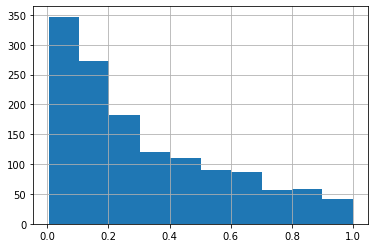

$$$  1367   334
total positive  334
tp tn fp fn 0   0   0   1
year  1995 positive  1
actual len  10806
len of xtest  1485
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   1996
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(1485,)
no of positive  360


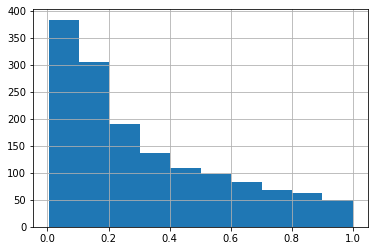

$$$  1485   360
total positive  360
tp tn fp fn 0   0   0   0
year  1996 positive  0
actual len  11161
len of xtest  1590
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1997
[1979 1992 1993 1994 1995 1998 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.781439393939394
(1590,)
no of positive  361
len of

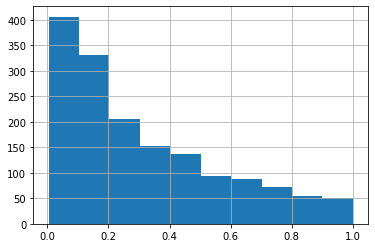

$$$  1590   361
total positive  361
tp tn fp fn 0   1   0   0
year  1997 positive  0
actual len  11526
len of xtest  1665
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  233
year   1998
[1979 1992 1993 1994 1995 1997 1999 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7604850704850705
(1665,)
no of positive  383
len o

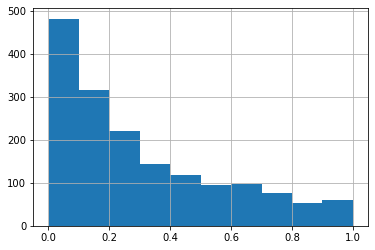

$$$  1665   383
total positive  383
tp tn fp fn 2   2   0   1
year  1998 positive  3
actual len  11998
len of xtest  1774
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   1999
[1979 1992 1993 1994 1995 1997 1998 2000 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.760418747918748
(1774,)
no of positive  379
len of

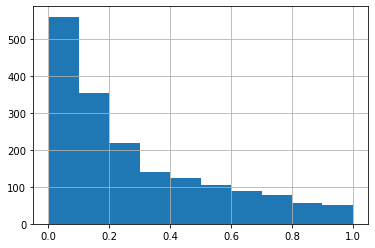

$$$  1774   379
total positive  379
tp tn fp fn 0   0   0   1
year  1999 positive  1
actual len  12451
len of xtest  1818
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  235
year   2000
[1979 1992 1993 1994 1995 1997 1998 1999 2003 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7779115002644416
(1818,)
no of positive  372
len o

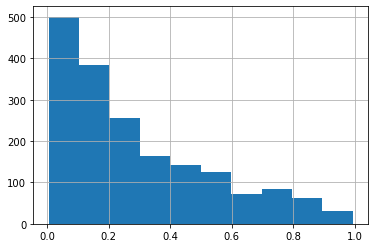

$$$  1818   372
total positive  372
tp tn fp fn 1   0   0   1
year  2000 positive  2
actual len  12969
len of xtest  1857
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2001
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(1857,)
no of positive  372


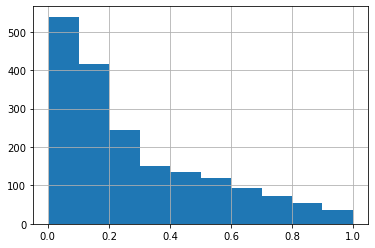

$$$  1857   372
total positive  372
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  13522
len of xtest  1888
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2002
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(1888,)
no of positive  369


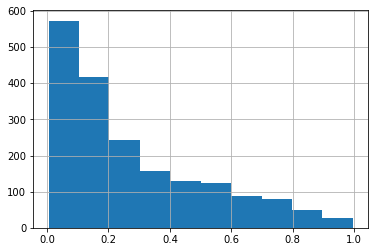

$$$  1888   369
total positive  369
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  14061
len of xtest  1905
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   2003
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2005 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7936638361638362
(1905,)
no of positive  344
len o

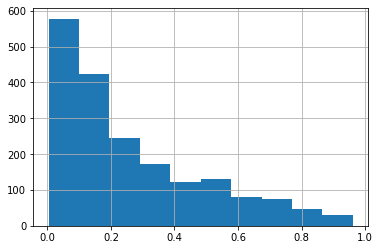

$$$  1905   344
total positive  344
tp tn fp fn 0   0   0   1
year  2003 positive  1
actual len  14609
len of xtest  1899
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2004
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(1899,)
no of positive  331


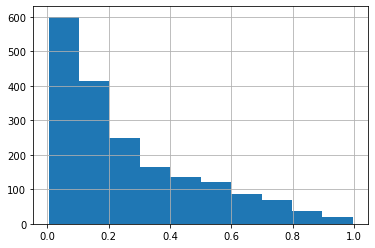

$$$  1899   331
total positive  331
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  15194
len of xtest  1963
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  235
year   2005
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7937720612720612
(1963,)
no of positive  339
len o

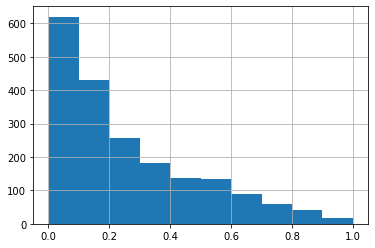

$$$  1963   339
total positive  339
tp tn fp fn 1   1   0   1
year  2005 positive  2
actual len  15905
len of xtest  1999
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  239
year   2006
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7763902763902765
(1999,)
no of positive  330


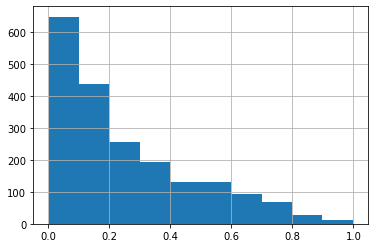

$$$  1999   330
total positive  330
tp tn fp fn 0   0   0   0
year  2006 positive  0
actual len  16546
len of xtest  2033
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  231
year   2007
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7851279276279276
(2033,)
no of positive  331
len o

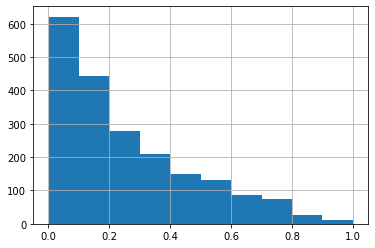

$$$  2033   331
total positive  331
tp tn fp fn 3   3   0   0
year  2007 positive  3
actual len  17295
len of xtest  2053
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  237
year   2008
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7820221445221446
(2053,)
no of positive  235
len o

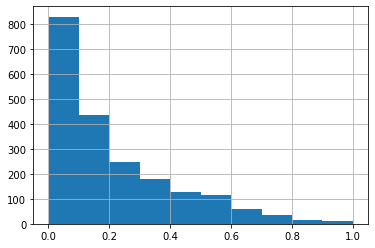

$$$  2053   235
total positive  235
tp tn fp fn 0   0   0   1
year  2008 positive  1
actual len  18046
len of xtest  2100
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2009
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7698906648906648
(2100,)
no of positive  325
len o

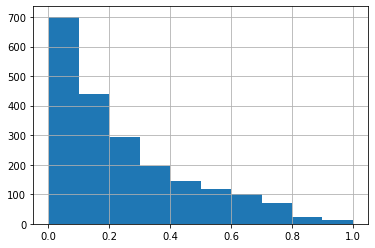

$$$  2100   325
total positive  325
tp tn fp fn 4   1   1   1
year  2009 positive  5
actual len  18754
len of xtest  2154
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  220
year   2010
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7703432678432678
(2154,)
no of positive  350
len o

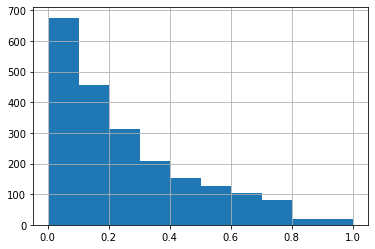

$$$  2154   350
total positive  350
tp tn fp fn 5   2   1   2
year  2010 positive  7
actual len  19515
len of xtest  2204
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  215
year   2011
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7840287490287491
(2204,)
no of positive  322
len o

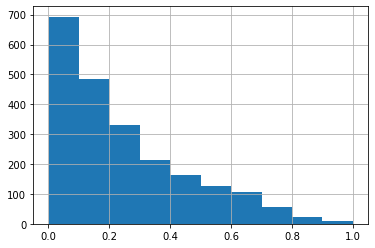

$$$  2204   322
total positive  322
tp tn fp fn 8   1   1   3
year  2011 positive  11
actual len  20250
len of xtest  2251
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  219
year   2012
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7830025530025531
(2251,)
no of positive  207
len 

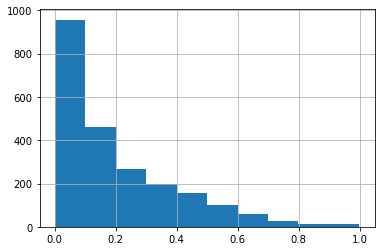

$$$  2251   207
total positive  207
tp tn fp fn 5   4   1   3
year  2012 positive  8
actual len  21177
len of xtest  2325
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  217
year   2013
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7703144078144079
(2325,)
no of positive  348
len o

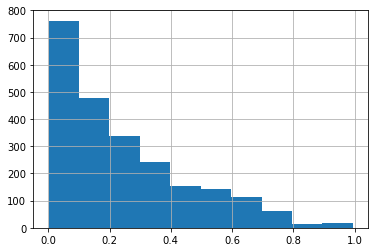

$$$  2325   348
total positive  348
tp tn fp fn 7   5   2   1
year  2013 positive  8
actual len  22051
len of xtest  2438
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  213
year   2014
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2015 2016 2017 2018 2019 2020]
cv score  0.7899841824841826
(2438,)
no of positive  365
len o

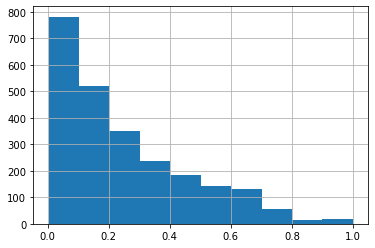

$$$  2438   365
total positive  365
tp tn fp fn 9   2   0   3
year  2014 positive  12
actual len  23031
len of xtest  2483
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2015
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2016 2017 2018 2019 2020]
cv score  0.7846353646353647
(2483,)
no of positive  349
len 

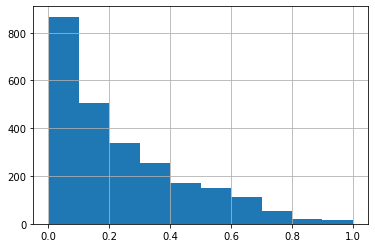

$$$  2483   349
total positive  349
tp tn fp fn 3   2   2   1
year  2015 positive  4
actual len  23994
len of xtest  2570
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2016
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2017 2018 2019 2020]
cv score  0.779134754134754
(2570,)
no of positive  334
len of

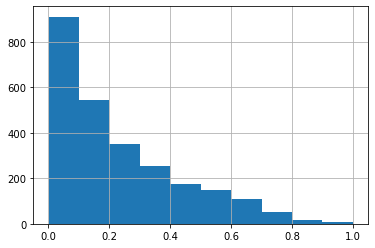

$$$  2570   334
total positive  334
tp tn fp fn 3   1   0   3
year  2016 positive  6
actual len  24970
len of xtest  2633
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  223
year   2017
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2018 2019 2020]
cv score  0.7717493617493616
(2633,)
no of positive  336
len o

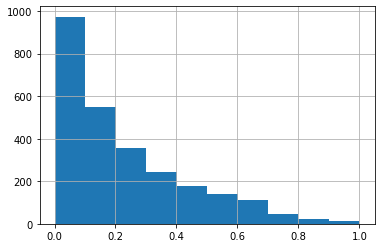

$$$  2633   336
total positive  336
tp tn fp fn 6   1   2   2
year  2017 positive  8
actual len  26037
len of xtest  2722
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  227
year   2018
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020]
cv score  0.7850671550671551
(2722,)
no of positive  349
len o

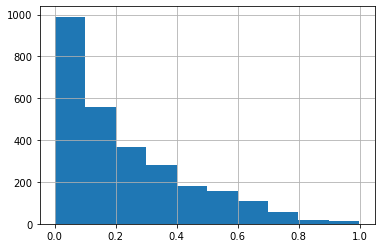

$$$  2722   349
total positive  349
tp tn fp fn 5   3   1   1
year  2018 positive  6
actual len  27104
len of xtest  2825
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  225
year   2019
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2020]
cv score  0.7716422466422466
(2825,)
no of positive  419
len o

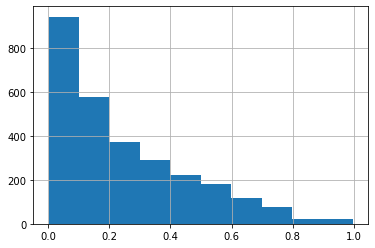

$$$  2825   419
total positive  419
tp tn fp fn 2   3   0   3
year  2019 positive  5
actual len  28585
len of xtest  2939
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  242
len of xtrain  231
year   2020
[1979 1992 1993 1994 1995 1997 1998 1999 2000 2003 2005 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7862259962259962
(2939,)
no of positive  310
len o

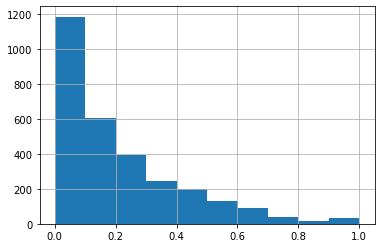

$$$  2939   310
total positive  310
tp tn fp fn 1   3   0   3
year  2020 positive  4
total pos  100  true pos  67  total false pos  299.4651162790698


In [3]:
##best independent model
##logistic regression
def recall2(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]
    ll = 350
    tot = 0
    ress = pd.merge(data,pred,on='cluster', how = 'inner')
    
    tp,tn,fp, fn = 0,0,0,0
    pred = pred.sort_values(by=['pred_log'], ascending = False)
    res = pred.head(ll)
    for ind in res.index:
        cl = res['cluster'][ind]
        dd = data[data['cluster'] == cl]
        if len(dd) != 0:
            dd = dd.to_numpy()
            cls = dd[0][dd.shape[1] - 1]
            if cls == 1:
                tp += 1
            else:
                fp += 1
        else:
            fp += 1
       
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", ll)
    print("tp fp",tp," ",fp)
    total_pos = len(ress[ress['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,ll - tp

def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    
    '''x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 1).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model
    
tot,tp,total_fp = 0,0,0
yr = 1978

while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_incites/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    x_test = x_test[x_test['rcr_hi'] >= 2.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.050]
    x_test = x_test[x_test['is_clinical'] >= 0.010] ##this one
    x_test = x_test[x_test['animal'] >= 0.01]

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    #x_test = x_test[x_test['nih'] >= 0.025]
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    
    x_test = x_test.drop(['prediction','cluster','year','n',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc','pct_of_secbiggest_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','n_secbiggest_anc'
                            ], axis = 1)
    
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    print(x_test.dtypes)
    '''x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low'], axis=1)
    '''
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.50]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.50]))
    a, b,c = recall(copy_test,0.50, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43)